# Timing and Plotting

## Agenda

1. Timing
2. The `timeit` module
3. Drawing plots with `matplotlib`
4. Timing plots

## 1. Timing

The [`time`](https://docs.python.org/3/library/time.html#module-time) module contains functions for obtaining and interpreting the current system time.

In [ ]:
import time
time.time() # seconds since the "epoch"

In [ ]:
time.time() // (365 * 24 * 60 * 60)

By taking start and stop "timestamps", we can measure the runtime of code:

In [ ]:
time.sleep(5)

## 2. The `timeit` module

The [`timeit`](https://docs.python.org/3/library/timeit.html) module is a built-in library for measuring the execution of code passed in as a string.

`timeit.timeit(stmt, setup, timer, number)`

1. stmt which is the statement you want to measure.
2. setup which is the code that you run before running the stmt. 
3. timer which is a timeit.Timer object; it usually has a sensible default value so you don’t have to worry about it.
4. the number which is the number of executions you’d like to run the stmt.

Returns the number of seconds it took to execute the code.

In [1]:
import timeit
timeit.timeit('sum(range(10000))', number=1000)

0.11077700002351776

In [2]:
timeit.timeit('sum(r)', setup='r=range(10000)', number=1000)

0.10358819999964908

We can easily use this to gather timings for multiple input values:

In [3]:
[timeit.timeit('sum(r)',
               setup=f'r = range({n})',
               number=1000)
 for n in range(1, 10000, 1000)]

[7.450004341080785e-05,
 0.008407599991187453,
 0.02150530001381412,
 0.025465100014116615,
 0.03416470001684502,
 0.045269700000062585,
 0.0518883999902755,
 0.05968230002326891,
 0.06779379997169599,
 0.0786717000300996]

Sometimes we might want to make use of functions defined in our notebook in the timed/setup code passed to `timeit`. We need to use the `globals` argument for this:

In [4]:
def fib(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)

In [5]:
[fib(n) for n in range(15)]

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]

In [6]:
[timeit.timeit(f'fib({n})',
               number=1000,
               globals=globals()) # "globals()" returns a dict of everything
                                  # defined in this module
 for n in range(1, 15)]

[5.2799994591623545e-05,
 0.00015430001076310873,
 0.00029529997846111655,
 0.000553599966224283,
 0.0011593999806791544,
 0.0019343000021763146,
 0.0039000999531708658,
 0.006128899985924363,
 0.01133280002977699,
 0.017821099958382547,
 0.020556800009217113,
 0.023629700008314103,
 0.0363513000193052,
 0.08317189995432273]

## 3. Drawing plots with `matplotlib`

The [matplotlib library](https://matplotlib.org) supports the creation of all sorts of visualizations. We will use it for drawing simple 2-dimensional plots.

The primary plotting function we will use is `matplotlib.pyplot.plot` ([full documentation here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)), which, when passed two "array-like" objects of equal length, will interpret and plot their contents as x and y axis coordinates. We will generally use tuples, lists, and ranges as array-like objects. Note that generators are *not* considered array-like by matplotlib.

Some examples (note that we use a semicolon after the call to `plot` to hide its return value):

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import math

plt.rcParams['figure.figsize'] = [10, 6] # set size of plot

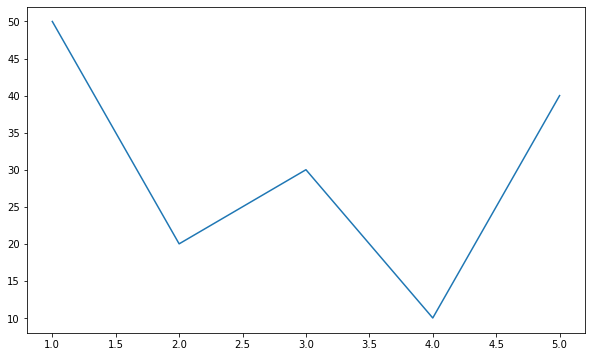

In [7]:
plt.plot([1, 2, 3, 4, 5],        # x-axis vals
         [50, 20, 30, 10, 40]);  # y-axis vals

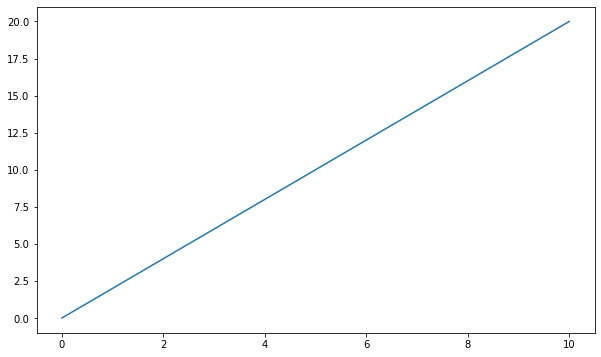

In [8]:
xs = range(11)
ys = [x*2 for x in xs]
plt.plot(xs, ys);

We can also provide an optional format string to `plot`, which controls marker, line-style, and color for the plot.

Here's a shortened list of options copied from the [full documentation of `plot`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot):

**Markers**

  - `.` : point marker
  - `o` : circle marker
  - `s` : square marker
  - `d` : diamond marker

**Line-styles**
 
  - `-` : solid line style
  - `--` : dashed line style
  - `:` : dotted line style

**Colors**

  - `k` : black
  - `r` : red
  - `g` : blue
  - `b` : green
  - `y` : yellow
  - `c` : cyan
  
Here are the above plots with some color and styling (if we omit a line style no connecting line is drawn between data points):

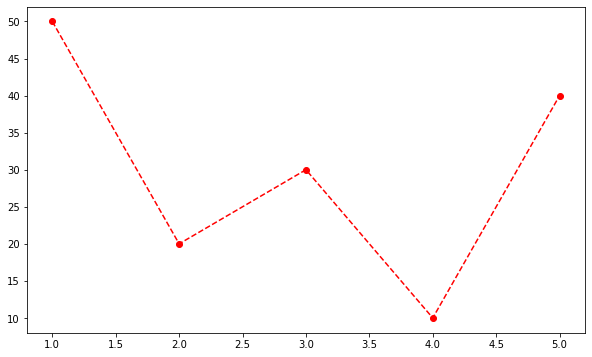

In [9]:
plt.plot([1, 2, 3, 4, 5], 
         [50, 20, 30, 10, 40], 
         'o--r');

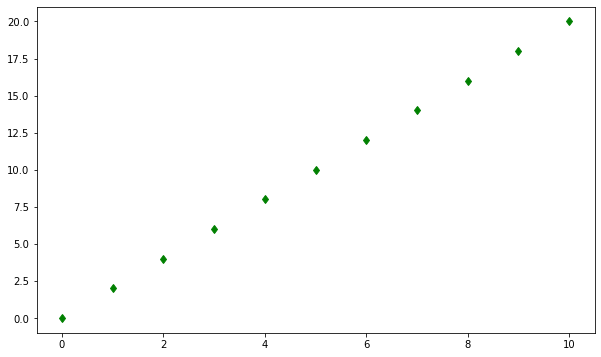

In [10]:
xs = range(11)
ys = [x*2 for x in xs]
plt.plot(xs, ys, 'dg');

Instead of regular `range` objects, which only allow for integral start/stop/step values, we typically prefer to use the [numpy library](https://numpy.org)'s `arange` and `linspace` functions with matplotlib. `arange` is like `range`, except we can use floating point values for start/stop/step. `linspace` lets us specify start and stop values (both inclusive), and the number of values to return in that interval.

Examples of `arange` and `linspace` calls (note that both functions return numpy arrays, which are iterable and can be passed to `plot`):

In [ ]:
np.arange(0.5, 2.5, 0.1)

In [ ]:
np.linspace(1, 10, 20)

In [ ]:
np.linspace(1, 100000, 50, dtype=int) # we can specify the data type 
                                       # to coerce values into integers

`plot` can be called multiple times in the same cell to draw multiple lines in the same chart. Below we use this facility together with `linspace` and a handful of list comprehensions to plot some common runtime complexity bounding functions (more on that soon) over a small interval: 

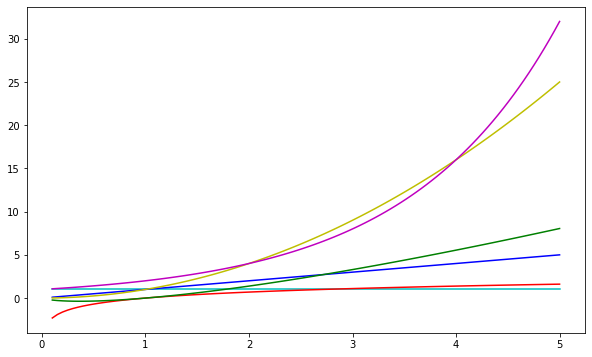

In [17]:
count = 100
xs = np.linspace(0.1, 5, count)
ys_const        = [1] * count
ys_log          = [math.log(x) for x in xs]
ys_linear       = [x for x in xs]
ys_linearithmic = [x * math.log(x) for x in xs]
ys_quadratic    = [x**2 for x in xs]
ys_exponential  = [2**x for x in xs]

plt.plot(xs, ys_const, 'c')
plt.plot(xs, ys_log, 'r')
plt.plot(xs, ys_linear, 'b')
plt.plot(xs, ys_linearithmic, 'g')
plt.plot(xs, ys_quadratic, 'y');
plt.plot(xs, ys_exponential, 'm');

## 4. Plotting timings

Plotting timing data collected from functions may help give us a sense of how their runtimes scale with increasing input sizes.

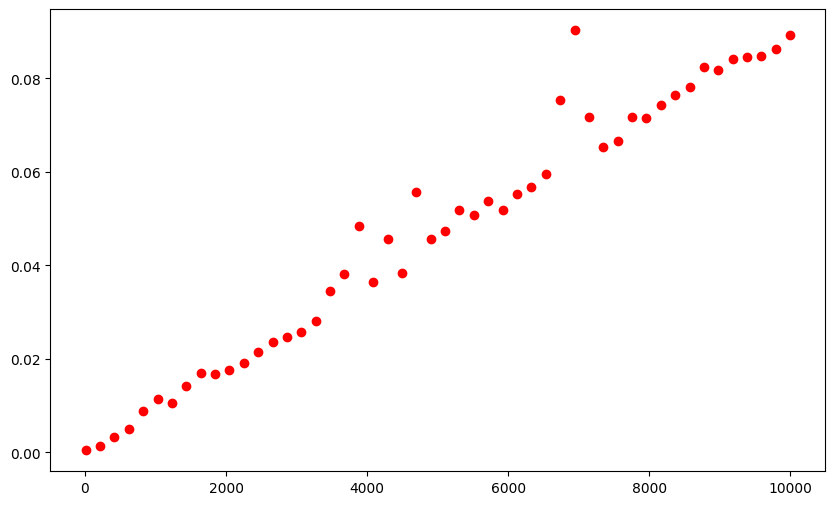

In [10]:
# runtimes for sum for increasing sizes of input

ns = np.linspace(10, 10000, 50, dtype=int)
ts = [timeit.timeit(f'sum(range({n}))', 
                    number=1000)
      for n in ns]
plt.plot(ns, ts, 'or');

Clearly, the runtime of `sum` is directly proportional to the number of values it operates on. 

If we assume a linear relationship, we can compute the average slope between adjacent data points to come up with an line of approximate fit that may help us predict the runtime of `sum`.

In [ ]:
total = 0

for i in range(len(ns)-1):
    total += (ts[i+1] - ts[i]) / (ns[i+1] - ns[i]) # slope = y / x
    
avg_slope = total / (len(ns)-1)

In [ ]:
avg_slope

In [ ]:
plt.plot(ns, ts, 'or')
plt.plot(ns, [avg_slope*n for n in ns], '--b');

We can also use [`polyfit`](https://numpy.org/doc/1.18/reference/generated/numpy.polyfit.html) to compute a best-fitting polynomial function of arbitrary degree for our data:

In [ ]:
degree = 10
coeffs = np.polyfit(ns, ts, degree)
p = np.poly1d(coeffs)
plt.plot(ns, ts, 'or')
plt.plot(ns, [p(n) for n in ns], '-b');

In [ ]:
coeffs

### Is there a downside to this approach?

Choosing an ill-fitting function may result in wildly inaccurate runtime predictions. Worse, inaccuracies are compounded as input sizes grow large!

How do we know what class of function to use (e.g., logarithmic, linear, nth-degree polynomial, exponential) for modeling the runtime behavior of algorithms? 

Can we reliably determine this through empirical observation?